# Craigslist EDA Notebook

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

#setting plot asthetics and sizes
sns.set(style='white', rc={'figure.figsize':(12,6)})

## Data Loading

In [2]:
#data comes from craigslist_data_cleaning notebook
craig = pd.read_csv('craig.csv')
craig.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,county_fips,county_name,state_fips,state_code,state_name,weather,inf_model,lat_short,long_short,null_state_code
0,marshall,11900,2010.0,dodge,challengerse,good,6 cylinders,gas,43600.0,clean,...,46083.0,Lincoln,46.0,SD,South Dakota,38.0,challenger,43.48,-96.70,0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,46039.0,Deuel,46.0,SD,South Dakota,38.0,fleetwood,44.76,-96.69,0
2,marshall,17550,2008.0,ford,f150,NaN,NaN,gas,NaN,clean,...,46093.0,Meade,46.0,SD,South Dakota,38.0,f150,44.14,-103.21,0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,19143.0,Osceola,19.0,IA,Iowa,47.0,taurus,43.28,-95.59,0
4,marshall,400,2001.0,NaN,2001grandprix,NaN,NaN,gas,217000.0,clean,...,19109.0,Kossuth,19.0,IA,Iowa,47.0,grandprix,43.03,-94.41,0


In [3]:
craig.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather,lat_short,long_short,null_state_code
count,1.509089e+06,1.503374e+06,9.981320e+05,1.509089e+06,1.509089e+06,1.459350e+06,1.459350e+06,1.458791e+06,1.509089e+06,1.509089e+06,1.509089e+06
mean,1.152066e+05,2.004495e+03,1.149598e+05,3.879238e+01,-9.350121e+01,2.852096e+04,2.843452e+01,5.378573e+01,3.874403e+01,-9.350239e+01,1.334580e-03
std,1.048015e+07,1.226344e+01,1.419023e+05,5.743444e+00,1.668686e+01,1.601729e+04,1.599533e+01,7.755536e+00,5.947533e+00,1.683612e+01,3.650753e-02
min,1.000000e+00,3.020000e+02,0.000000e+00,1.932065e+01,-1.661151e+02,1.001000e+03,1.000000e+00,2.900000e+01,-8.481000e+01,-1.000000e+03,0.000000e+00
25%,3.000000e+03,2.002000e+03,5.800000e+04,3.489460e+01,-1.051029e+02,1.213100e+04,1.200000e+01,4.800000e+01,3.488000e+01,-1.051000e+02,0.000000e+00
50%,6.900000e+03,2.007000e+03,1.078690e+05,3.940804e+01,-8.810650e+01,2.902900e+04,2.900000e+01,5.300000e+01,3.940000e+01,-8.810000e+01,0.000000e+00
75%,1.490000e+04,2.012000e+03,1.540000e+05,4.252179e+01,-8.097010e+01,4.200300e+04,4.200000e+01,5.900000e+01,4.252000e+01,-8.095000e+01,0.000000e+00
max,2.068627e+09,2.019000e+03,1.000000e+07,7.020945e+01,-5.766040e+01,5.604500e+04,5.600000e+01,7.900000e+01,9.000000e+01,1.397100e+02,1.000000e+00


In [42]:
print(craig.columns)

Index(['city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'county_fips',
       'county_name', 'state_fips', 'state_code', 'state_name', 'weather',
       'inf_model', 'lat_short', 'long_short', 'null_state_code'],
      dtype='object')


## Manufacturer & Price Analysis

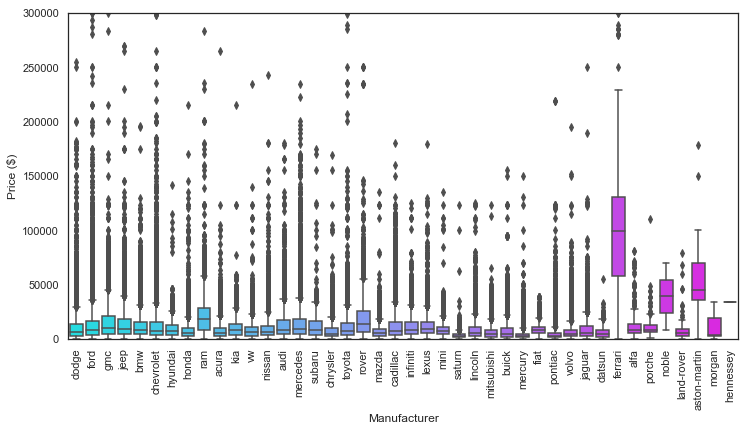

In [6]:
sns.boxplot(
    x='manufacturer',
    y='price',
    data=craig,
    palette='cool'
)
plt.xlabel('Manufacturer')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.ylim(0, 300000)
plt.show()

Features that identify whether or not a vehicle is a Ferrari, Noble, Aston Martin, or Hennessey would help to define the upper end of the price regime.

In [7]:
#singling out the number of rows with the commonly seen $1 price scam
craig_singledollar = craig.loc[craig.price == 1]
len(craig_singledollar)

14763

It looks like most of the manufacturers have realistic outliers up to 200,000 dollars except for Ferrari (will retain all of their datapoints). Given that pricing a car for 1 dollar on Craigslist is a strategy that sellers use to get buyers to look at their cars and not the actual value, I think will exclude the 1$ values from the target set. Because this is such a well known strategy, there are almost 15,000 cars listed for 1 dollar. Before doing any more data analysis or feature engineering I will filter the dataset to focus on the future modelled correlations. I want to do a quick breakdown of the most popular manufacturers and a breakdown prices by state.

In [8]:
mask = (
    (craig.price > 1) &
    (craig.price <= 200000) |
    (craig.manufacturer == 'ferrari') |
    (craig.manufacturer == 'aston-martin')
)
craig_clean = craig.loc[mask]
print('The modeled dataset is {:,} rows, down from {:,}. There were {:,} cars less than $1 and {:,} cars more than $200,000'.format(
    len(craig_clean),
    len(craig),
    len(craig.loc[craig['price'] <= 1]),
    len(craig.loc[craig['price'] > 200000]))
)

The modeled dataset is 1,493,470 rows, down from 1,509,089. There were 14,763 cars less than $1 and 881 cars more than $200,000


In [9]:
craig_clean.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather,lat_short,long_short,null_state_code
count,1.493470e+06,1.487797e+06,9.927460e+05,1.493470e+06,1.493470e+06,1.443863e+06,1.443863e+06,1.443323e+06,1.493470e+06,1.493470e+06,1.493470e+06
mean,1.080207e+04,2.004555e+03,1.149914e+05,3.881176e+01,-9.352632e+01,2.853583e+04,2.844941e+01,5.376613e+01,3.876335e+01,-9.352726e+01,1.335815e-03
std,1.191211e+04,1.218100e+01,1.407776e+05,5.737936e+00,1.669701e+01,1.601616e+04,1.599416e+01,7.751354e+00,5.941778e+00,1.684678e+01,3.652440e-02
min,1.000000e+00,3.020000e+02,0.000000e+00,1.932065e+01,-1.661151e+02,1.001000e+03,1.000000e+00,2.900000e+01,-8.481000e+01,-1.000000e+03,0.000000e+00
25%,3.200000e+03,2.002000e+03,5.817100e+04,3.492050e+01,-1.051030e+02,1.301300e+04,1.300000e+01,4.800000e+01,3.491000e+01,-1.051000e+02,0.000000e+00
50%,6.990000e+03,2.007000e+03,1.080000e+05,3.943297e+01,-8.813822e+01,2.902900e+04,2.900000e+01,5.300000e+01,3.943000e+01,-8.813000e+01,0.000000e+00
75%,1.495000e+04,2.012000e+03,1.540000e+05,4.253400e+01,-8.096944e+01,4.200300e+04,4.200000e+01,5.900000e+01,4.253000e+01,-8.095000e+01,0.000000e+00
max,3.450000e+06,2.019000e+03,1.000000e+07,7.020945e+01,-5.766040e+01,5.604500e+04,5.600000e+01,7.900000e+01,9.000000e+01,1.397100e+02,1.000000e+00


### Price Distribution

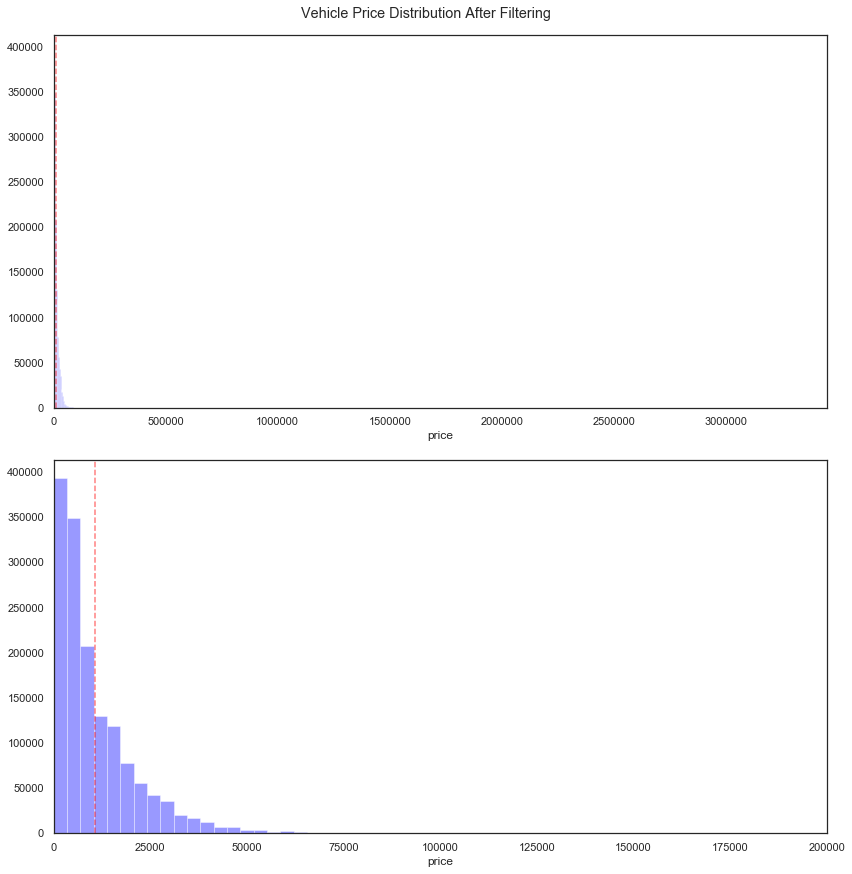

In [10]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(craig_clean.price, bins=1000, color='blue', kde=False)
plt.axvline(craig_clean.price.mean(), color='red', alpha=0.5, linestyle='--')
plt.xlim(0,3.45e6)

plt.subplot(2,1,2)
sns.distplot(craig_clean.price, bins=1000, color='blue', kde=False)
plt.axvline(craig_clean.price.mean(), color='red', alpha=0.5, linestyle='--')
plt.xlim(0,200000)

plt.suptitle('Vehicle Price Distribution After Filtering', y=1.01)
plt.tight_layout()
plt.show()

The distribution of prices is still heavily skewed to the right because of the Ferrari that is listed for 3.45 million dollars. However, the mean has come down an order of magnitude to a more reasonable 11,071.15 dollars. In total 18,479 vehicles were removed due to percieved pricing issues.

I think in future iterations it would be good to break the master dataframe into different manufacturer distributions and be more deliberate with the cutoff for the upper bound of prices. There could have been other manufacturers with legitimate cars priced over 200,000 dollars.


In [11]:
#print(craig_clean.loc[craig_clean.price < 1000]['drive'].isna().value_counts())
#print('\n', craig_clean['vin'].isna().value_counts())
print('Vehicle costs for cars over 200,000 miles:      $ {:.2f}'.format(craig_clean.loc[craig_clean.odometer > 200000].price.mean()))
print('Average price for salvage titles:               $ {:.2f}'.format(craig_clean.loc[craig_clean.title_status == 'salvage'].price.mean()))
print('Average price for parts only titles:            $ {:.2f}'.format(craig_clean.loc[craig_clean.title_status == 'parts only'].price.mean()))

Vehicle costs for cars over 200,000 miles:      $ 5986.82
Average price for salvage titles:               $ 6919.38
Average price for parts only titles:            $ 2054.46


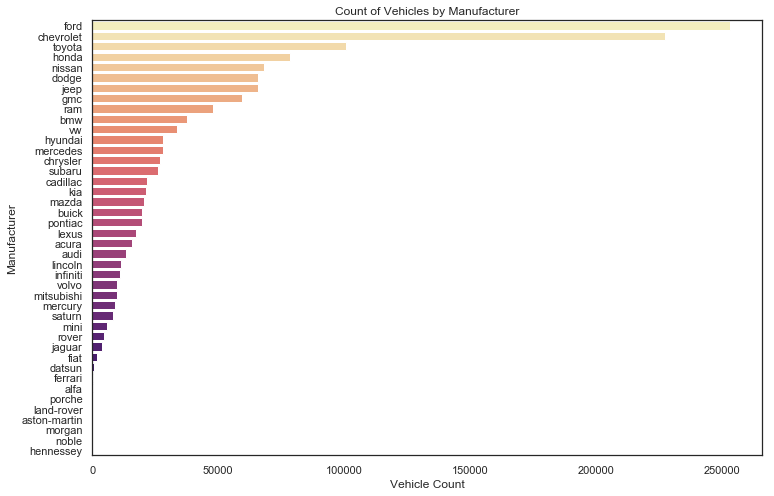

The top 5 car manufacturers sold on craigslist are 
ford         253045
chevrolet    227354
toyota       100892
honda         78668
nissan        68209
Name: manufacturer, dtype: int64,
and they make up 728168 rows of the total 1493470


In [12]:
#barchart showing the most listed manufacturers in the dataset
plt.figure(figsize=(12,8))
sns.barplot(
    craig_clean['manufacturer'].value_counts(),
    craig_clean['manufacturer'].value_counts().index,
    orient='h',
    palette='magma_r'
)
plt.xlabel('Vehicle Count')
plt.ylabel('Manufacturer')
plt.title('Count of Vehicles by Manufacturer')
plt.show()
print('The top 5 car manufacturers sold on craigslist are \n{},\nand they make up {} rows of the total {}'.format(
    craig_clean['manufacturer'].value_counts().head(5),
    craig_clean['manufacturer'].value_counts().head(5).sum(),
    len(craig_clean))
)

Ford, Chevrolet, Toyota, Honda, and Nissan make up almost 50% of the dataset. Ford and Chevrolet are the most popular vehicles posted on Craigslist by over double the volume of Toyota. Volume is a good measure to understand what type of car you're most likely to find on the site, but it doesn't tell us much about which vehicles are the most or least expensive.

## Model Level Analysis

In [13]:
f150 = craig_clean.loc[craig_clean.inf_model == 'f150']
f250 = craig_clean.loc[craig_clean.inf_model == 'f250']
model_1500 = craig_clean.loc[craig_clean.inf_model == '1500']
model_2500 = craig_clean.loc[craig_clean.inf_model == '2500']
wrangler = craig_clean.loc[craig_clean.inf_model == 'wrangler']
cherokee = craig_clean.loc[craig_clean.inf_model == 'cherokee']
mustang = craig_clean.loc[craig_clean.inf_model == 'mustang']
audi_tt = craig_clean.loc[craig_clean.inf_model == 'tt']
ion = craig_clean.loc[craig_clean.inf_model == 'ion']
cc = craig_clean.loc[craig_clean.inf_model == 'cc']
print(craig_clean.inf_model.value_counts().head(13))
top_ten_models = {'cherokee':cherokee, 
                    '1500':model_1500,
                    '2500':model_2500,
                    'f150':f150, 
                    'cc':cc, 
                    'tt':audi_tt, 
                    'ion':ion, 
                    'f250':f250, 
                    'mustang':mustang, 
                    'wrangler':wrangler}
top_10_models = [f150, f250, wrangler, mustang, audi_tt, ion, cc, cherokee, model_1500, model_2500]

1500        60099
f150        51053
cc          29853
tt          28898
ion         27761
f250        26190
2500        25963
wrangler    22827
cherokee    21434
mustang     21323
civic       19964
van         19050
f350        17507
Name: inf_model, dtype: int64


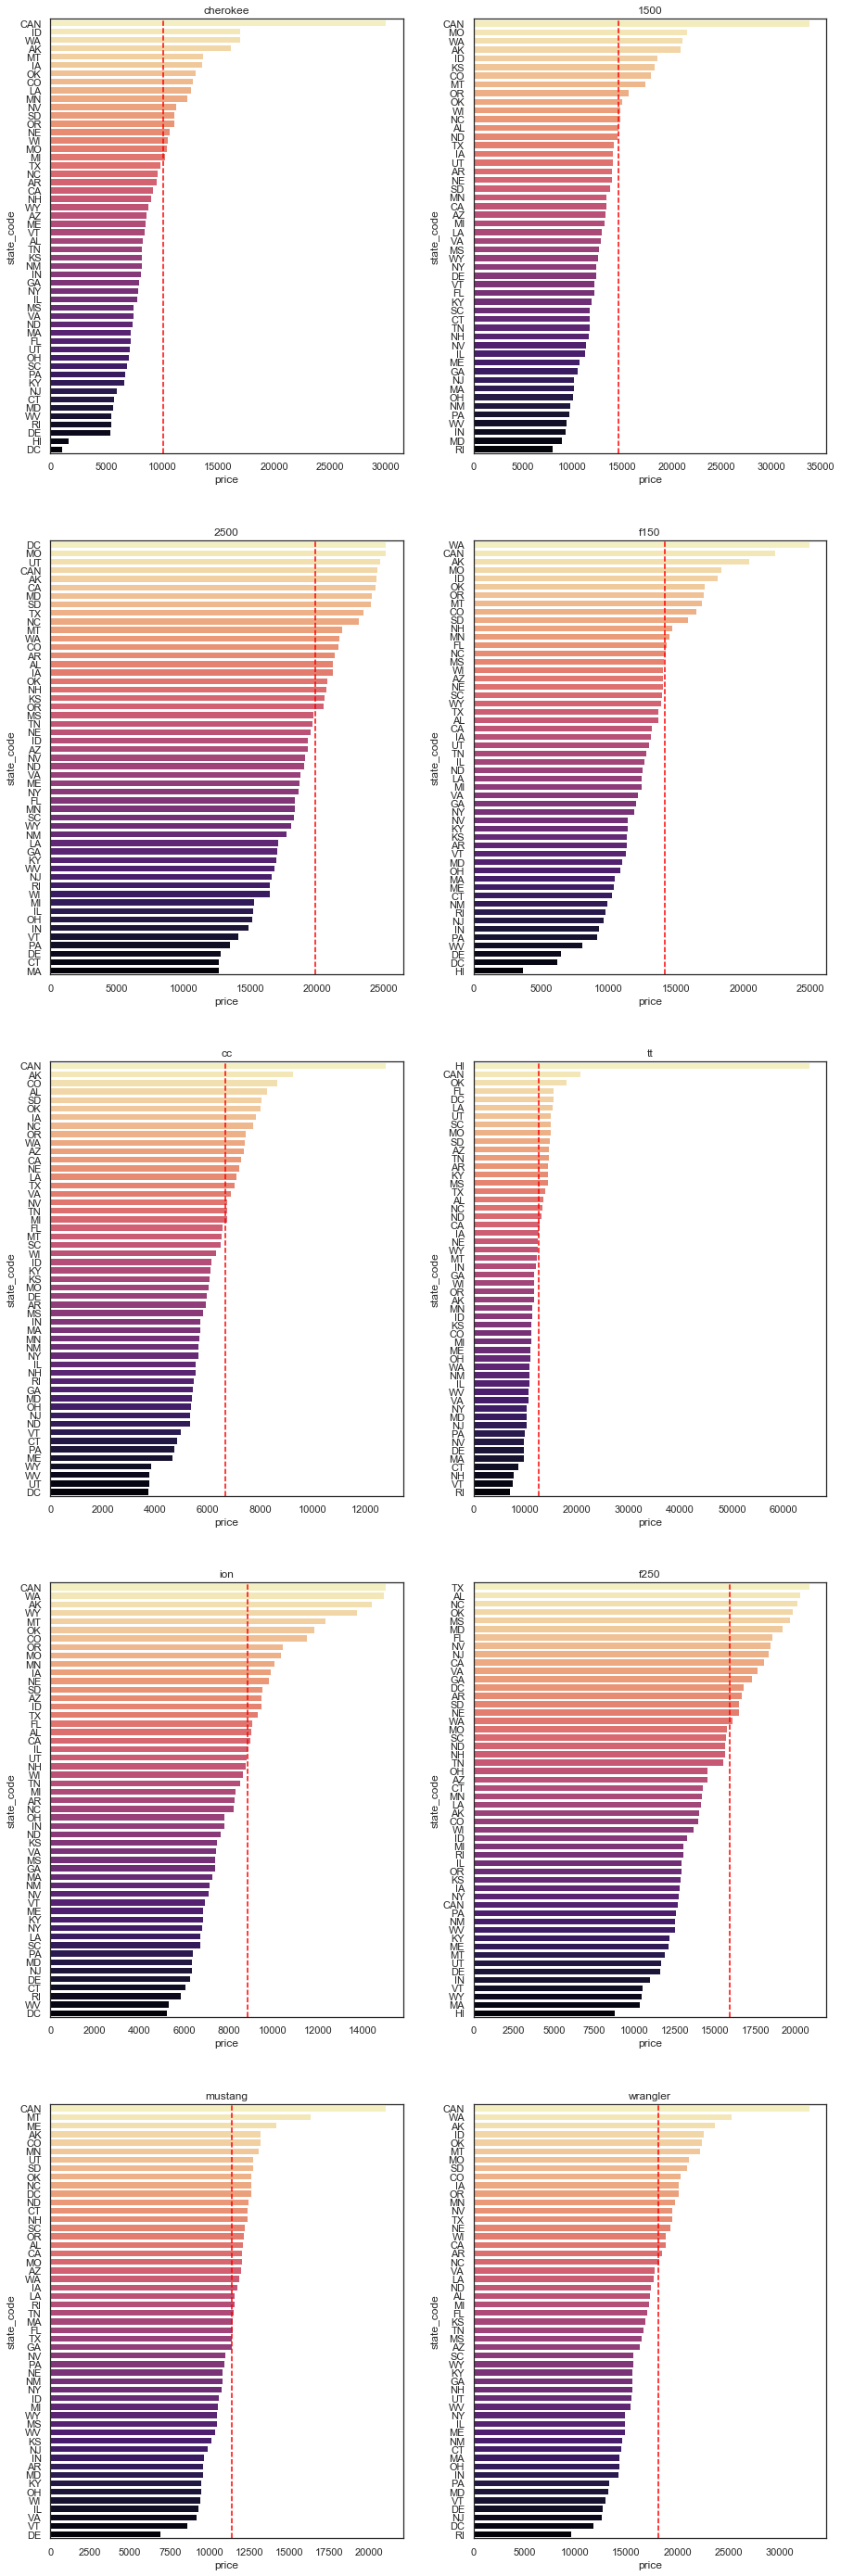

In [14]:
plt.figure(figsize=(15,50))
n=1
for key in top_ten_models:
    mdl_state = top_ten_models[key].groupby('state_code')['price'].aggregate(np.mean).sort_values(ascending=False)
    plt.subplot(5,2,n)
    sns.barplot(
        mdl_state,
        mdl_state.index,
        orient='h',
        palette='magma_r'
    )
    plt.axvline(top_ten_models[key].price.mean(), color='red', linestyle='--')
    plt.title(key)
    n+=1
plt.show()

In [15]:
model_grouped_price = craig_clean.groupby('inf_model')['price'].aggregate(np.mean).sort_values(ascending=False)
grt_avg = model_grouped_price > 11000
grt_avg.value_counts()
print('Top 10 models by average price:\n{}'.format(model_grouped_price.head(10)))
print('\nAverage vehicle price in the dataset: {}'.format(craig_clean.price.mean()))

Top 10 models by average price:
inf_model
porsche911    43772.393103
fpace         42399.318182
giulia        41723.687500
qx80          39181.888889
gx460         32144.080000
f650          30589.832891
peterbilt     30358.013710
evoque        30141.553314
5500          28289.507508
qx60          27482.401826
Name: price, dtype: float64

Average vehicle price in the dataset: 10802.068814237982


The top ten models in the dataset are far above the average vehicle price and will make a good feature.

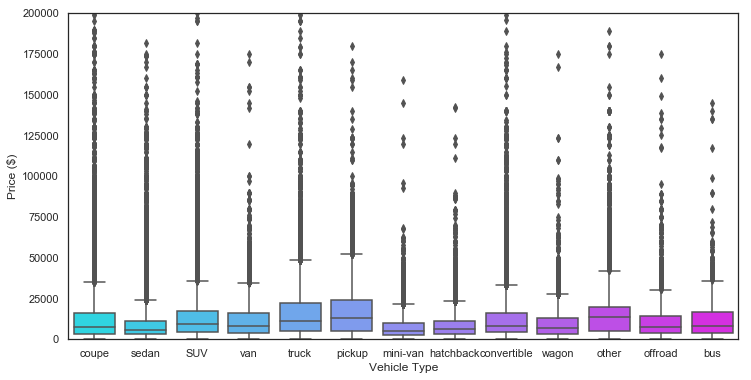

In [18]:
sns.boxplot(
    craig_clean.type,
    craig_clean.price,
    palette='cool'
)
plt.xlabel('Vehicle Type')
plt.ylabel('Price ($)')
plt.ylim(0,200000)
plt.show()

It looks like pickup's and trucks are the most expensive vehicles in the dataset. All of the vehicle type prices are right skewed with most of the prices falling at 20,000 dollars or below. The breakdown of prices for each type of vehicle could be very different based on what state/city the vehicles are from, which will be something important to look for.

## Location Based Information

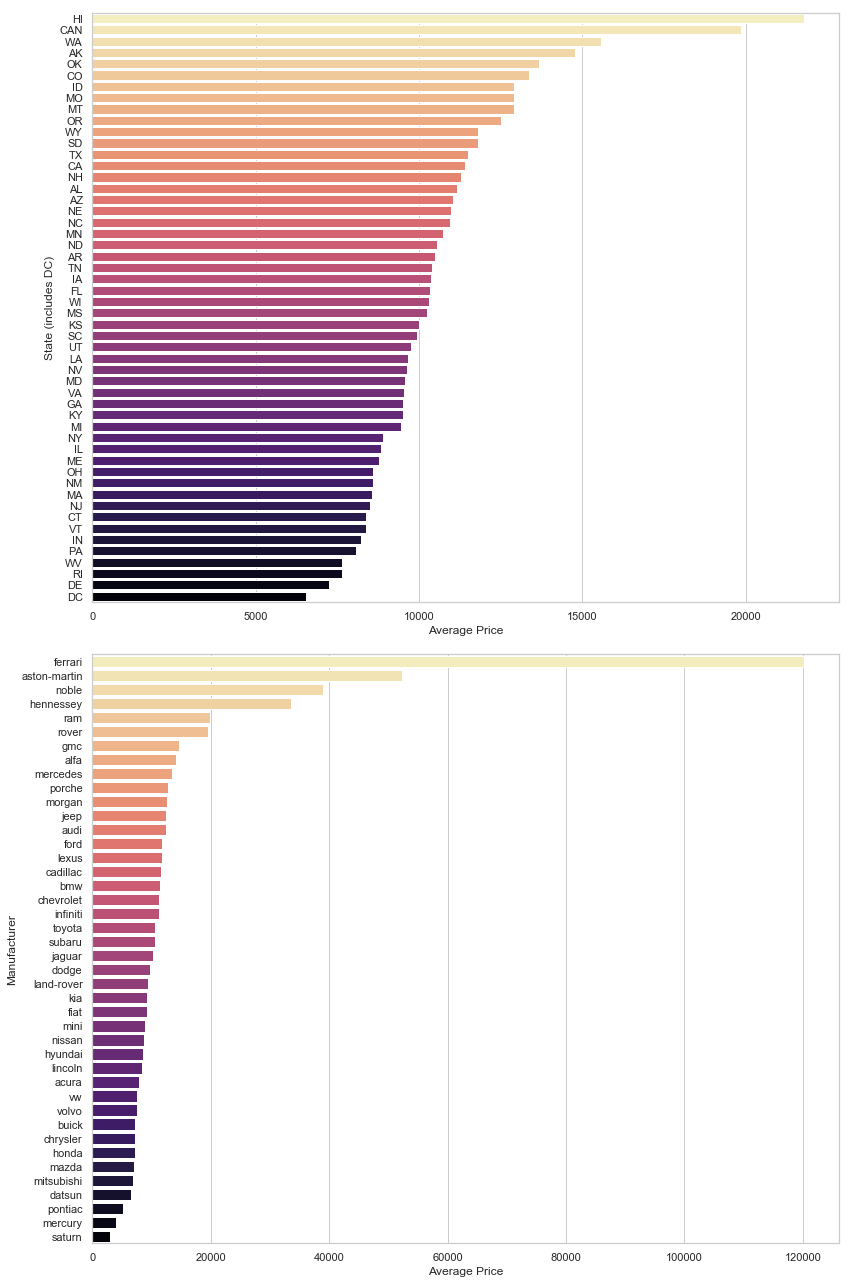

In [19]:
#averaging the vehicle price and manufacturer/state and sorting them for a barchart
state_df = craig_clean.groupby('state_code')['price'].aggregate(np.mean)
state_df.sort_values(ascending=False, inplace=True)
manufacturer_df = craig_clean.groupby('manufacturer')['price'].aggregate(np.mean)
manufacturer_df.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,18))
sns.set_style('whitegrid')
plt.subplot(2,1,1)
sns.barplot(
    state_df,
    state_df.index,
    orient='h',
    palette='magma_r'
)
plt.xlabel('Average Price')
plt.ylabel('State (includes DC)')

plt.subplot(2,1,2)
sns.barplot(
    manufacturer_df,
    manufacturer_df.index,
    orient='h',
    palette='magma_r'
)
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')

plt.tight_layout()
plt.show()

The top 10 states based on average vehicle price have rugged terrains, are heavy agricultural states, or an island (cough cough Hawaii). That matches with trucks being the most expensive vehicles on average in the dataset. The top vehicles and states average prices will make good categorical variables of OLS.

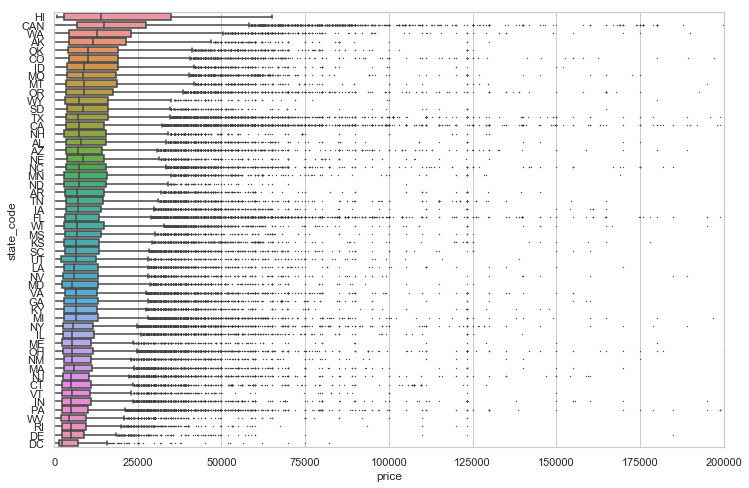

The number of vehicles in Hawaii:
False    1493449
True          21
Name: state_code, dtype: int64


In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(
    craig_clean.price,
    craig_clean.state_code,
    orient='h',
    fliersize=0.5,
    order=state_df.index
)
plt.xlim(0,200000)
plt.show()
print('The number of vehicles in Hawaii:\n{}'.format((craig_clean['state_code'] == 'HI').value_counts()))

Although Hawaii has the highest average vehicle price, it only has 21 vehicles in the dataset. Hawaii might come down the list if there were more vehicles for sale considering the distribution of datapoints is not dissimilar from the other states. Seeing that the highest average prices come from Canada, Washington, Alaska, Oklahoma, and Colorado, weather and the drive of the vehicle will probably be important when considering the price. Before going there I want to better understand how mileage impacts the price.

## Odometer Distribution

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


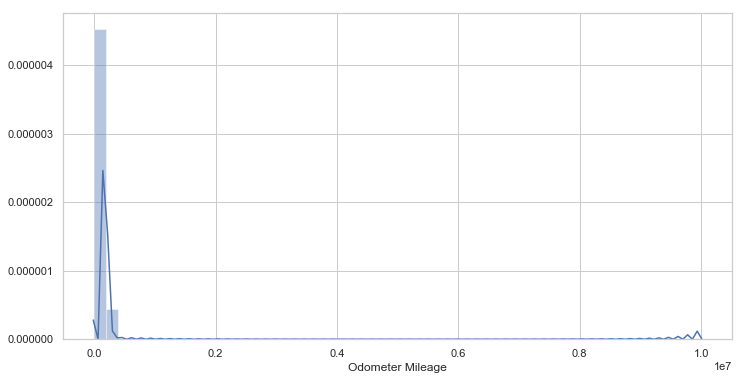

,price,year,odometer,lat,long,county_fips,state_fips,weather,lat_short,long_short,null_state_code
count,1908.000000,1902.000000,1.908000e+03,1908.000000,1908.000000,1871.000000,1871.000000,1869.000000,1908.000000,1908.000000,1908.000000
mean,6548.958595,2000.792324,2.185318e+06,38.737988,-93.493170,28103.952966,28.018707,53.702515,38.685886,-93.489864,0.001572
std,9366.021507,9.238524,1.809878e+06,5.493895,16.419319,16122.319458,16.101622,7.941657,5.652004,16.418708,0.039632
min,4.000000,1937.000000,1.000131e+06,25.496611,-150.071182,1003.000000,1.000000,29.000000,-2.430000,-150.070000,0.000000
25%,1890.000000,1998.000000,1.330129e+06,34.949200,-105.942535,12111.000000,12.000000,47.000000,34.910000,-105.940000,0.000000
50%,3500.000000,2003.000000,1.710000e+06,39.513335,-88.131542,27159.000000,27.000000,53.000000,39.500000,-88.130000,0.000000
75%,7000.000000,2006.000000,2.100000e+06,42.461100,-81.058400,42003.000000,42.000000,59.000000,42.462500,-81.060000,0.000000
max,141594.000000,2019.000000,1.000000e+07,64.673500,-69.247900,56025.000000,56.000000,71.000000,64.670000,-69.250000,1.000000


In [21]:
sns.distplot(craig_clean.odometer.dropna())
plt.xlabel('Odometer Mileage')
plt.show()

craig_clean.loc[craig_clean.odometer > 1000000].describe()

There is an uptick in vehicles with high mileage (> 1,000,000 miles) in the distribution. In total there are ~1900 rows with over 1 million miles. This could be for a couple reasons:

(1) there are actually that many vehicles that have broken the million mile mark 
(2) the seller mistyped the mile decimal as another full mile which would increase the mileage by an order of magnitude. 
(3) the "vehicle" is a parts car w/no engine that the seller just number smashed a mileage

There are many reasons why the odometer reading's are well over what I think is a realistic value. For now I want to look at the correlations with price to see what affect mileage has on a cars percieved value.

In [22]:
craig_clean = craig_clean.loc[craig_clean['odometer'] < 1000000]

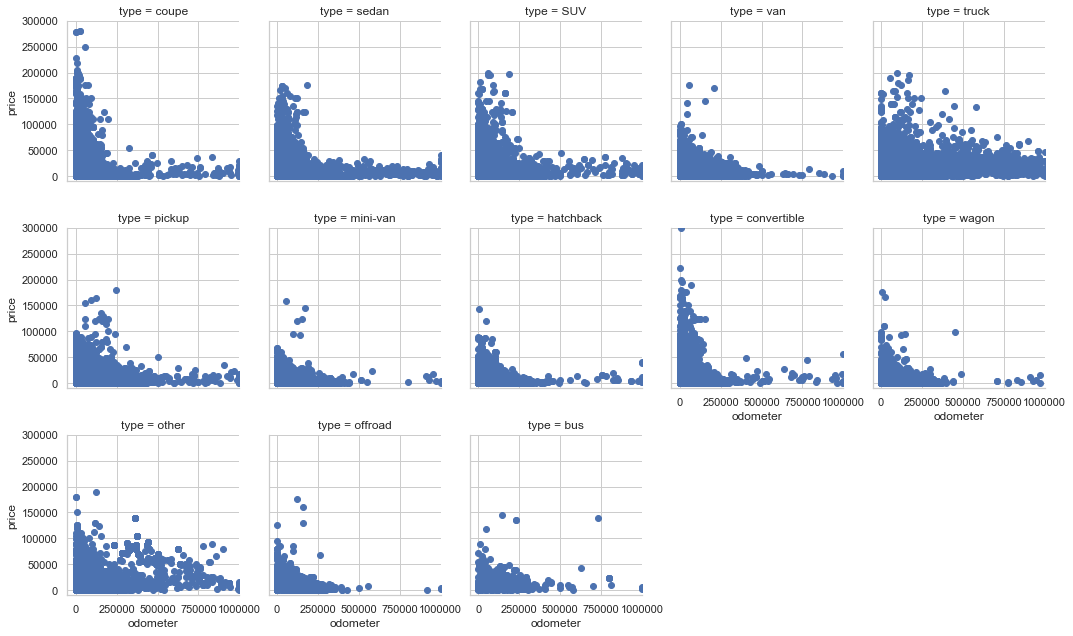

In [23]:
g = sns.FacetGrid(data=craig_clean, col='type', col_wrap=5)
g.map(plt.scatter, 'odometer', 'price')
plt.ylim(-10000, 300000)
plt.xlim(-50000, 1000000)
plt.show()

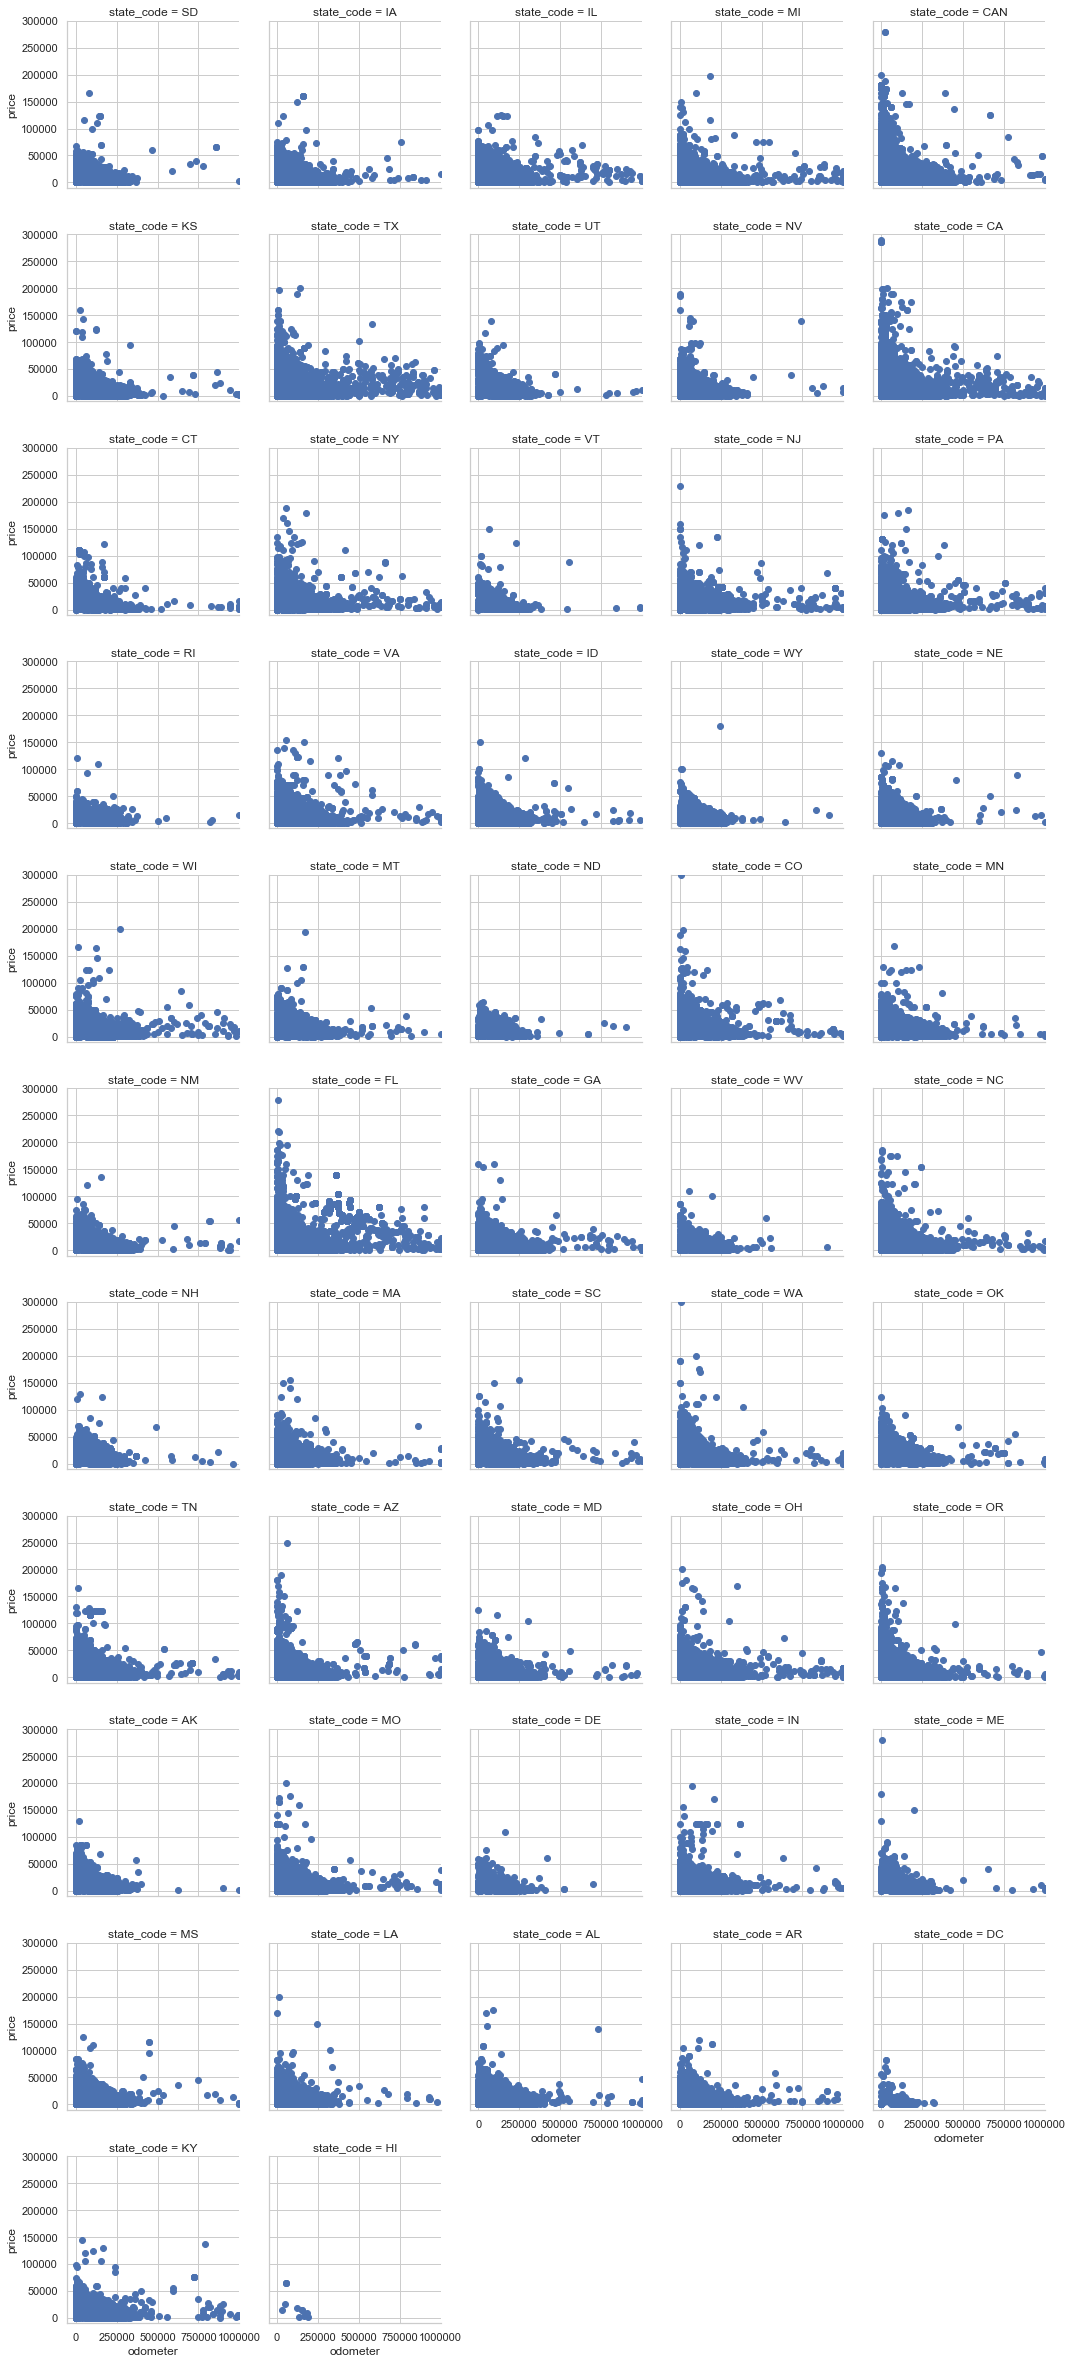

In [24]:
g = sns.FacetGrid(data=craig_clean, col='state_code', col_wrap=5)
g.map(plt.scatter, 'odometer', 'price')
plt.ylim(-10000, 300000)
plt.xlim(-50000, 1000000)
plt.show()

In all the states there is an increase in car value as mileage decreases. There is quite a lot of scatter as mileage drops below ~200,000, but the correlation still looks good. Likely there are a few cases where certain car model values are less influenced by mileage than others (i.e. classic cars with low mileage that are unrestored will be less expensive than restored cars with higher mileage). This will be useful in the modelling stage.

## Weather Data

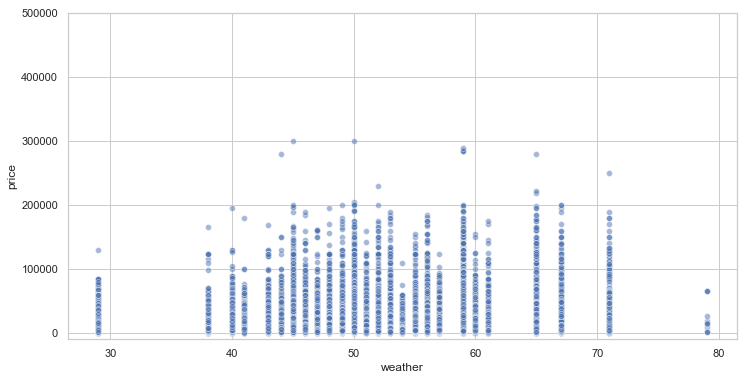

In [25]:
sns.scatterplot(
    x=craig_clean.weather,
    y=craig_clean.price,
    alpha=0.5,
    #hue=craig_clean.type
)
plt.ylim(-10000,500000)
plt.show()

There isn't a clear correlation between weather and price on the gross scale. Because the temperature for each listing is an average for October-November in the state, this is essentially a categorical variable that mimics the state_code. I could try and look at the temp vs. price broken out by car_type or manufacturer to see if there would be a good categorical feature to use in a future iteration.

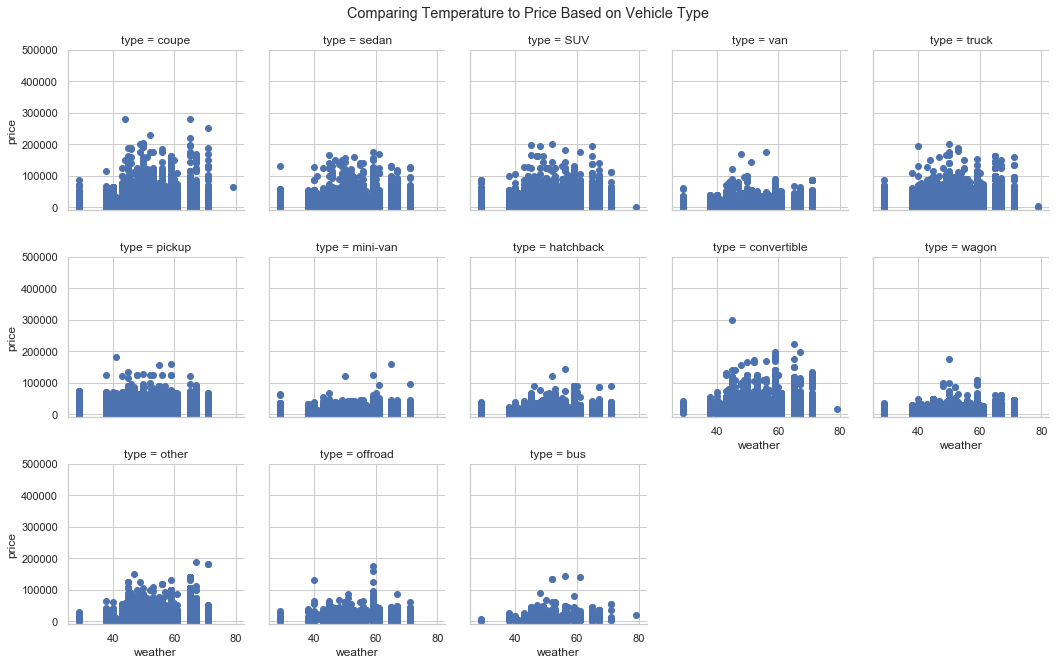

In [26]:
g = sns.FacetGrid(data=craig_clean, col='type', col_wrap=5)
g.map(plt.scatter, 'weather', 'price')
plt.ylim(-10000, 500000)
plt.suptitle('Comparing Temperature to Price Based on Vehicle Type', y=1.025)
plt.show()

Convertibles have a slight, positive correlation with the average state weather that I assume would be stronger if the weather variable was more granular.

## Car Color's & Price

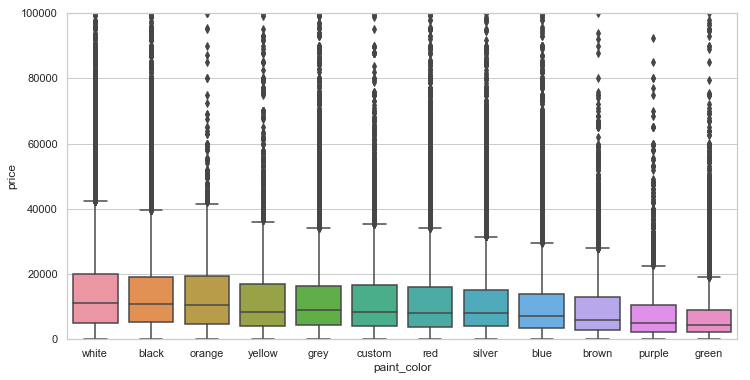

paint_color
white     14246.753317
black     13930.898201
orange    13803.627866
yellow    12932.863709
grey      12071.942838
custom    11878.114892
red       11400.401071
silver    10951.735172
blue      10166.057170
brown      9448.479151
purple     8616.269545
green      7409.433139
Name: price, dtype: float64


In [27]:
paint = craig_clean.groupby('paint_color')['price'].aggregate(np.mean).sort_values(ascending=False)

sns.boxplot(
    craig_clean.paint_color,
    craig_clean.price,
    order=paint.index
)
plt.ylim(0, 100000)
plt.show()

print(paint)

White and black cars are the most expensive on average in the dataset. There isn't a large difference between them and the next lowest (orange). The real spread comes from the low end, green cars are on average ~half the price of the white, black, orange, and yellow cars. Maybe a feature denoting cars that aren't green or purple would be helpful. this could also change based on the type of car.

<Figure size 864x1296 with 0 Axes>

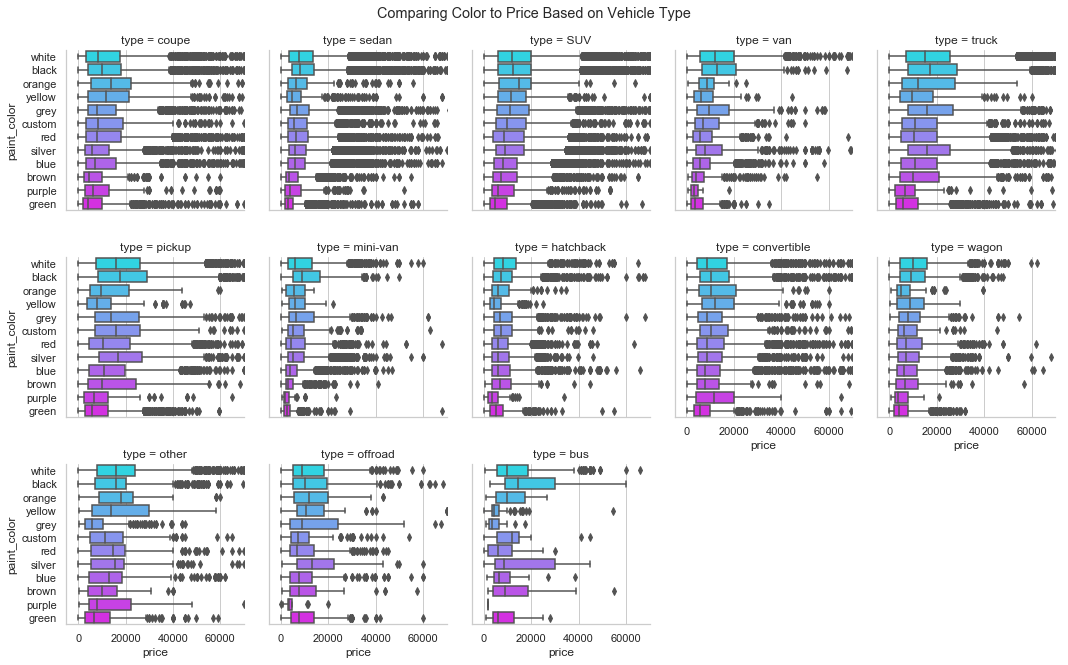

In [28]:
plt.figure(figsize=(12,18))
g = sns.FacetGrid(data=craig_clean, col='type', col_wrap=5)
g.map(sns.boxplot, 'price', 'paint_color', palette='cool', order=paint.index)
plt.xlim(-5000, 70000)
plt.suptitle('Comparing Color to Price Based on Vehicle Type', y=1.025)
plt.show()

The distributions of price by paint color mostly stay the same when broken out by vehicle type. Buses, coupes, trucks, and convertibles all have different max means than the overall dataset. Offroad vehicles and the other type might have different paint colors with a higher price.

In [29]:
coupe = craig_clean.loc[craig_clean.type == 'coupe']
coupe_paint = coupe.groupby('paint_color')['price'].aggregate(np.mean).sort_values(ascending=False)
convertible = craig_clean.loc[craig_clean.type == 'convertible']
convertible_paint = convertible.groupby('paint_color')['price'].aggregate(np.mean).sort_values(ascending=False)
print('coupe top colors:\n{}'.format(coupe_paint))
print('\nconvertible top colors:\n{}'.format(convertible_paint))

coupe top colors:
paint_color
orange    17143.246319
yellow    15501.250208
black     13515.126535
custom    13050.071429
red       12998.426266
white     12977.987059
grey      12364.899744
purple    11540.672862
blue      11504.999816
silver     9848.297961
green      8875.908420
brown      7721.666078
Name: price, dtype: float64

convertible top colors:
paint_color
yellow    15742.088472
orange    15249.196262
purple    14680.866667
custom    14436.426740
black     14246.831771
white     13582.042275
red       12762.173483
grey      12603.690295
blue      12379.724755
brown     11758.135802
silver    11454.089520
green      8374.618557
Name: price, dtype: float64


## Vehicle Age, Type, & Mileage

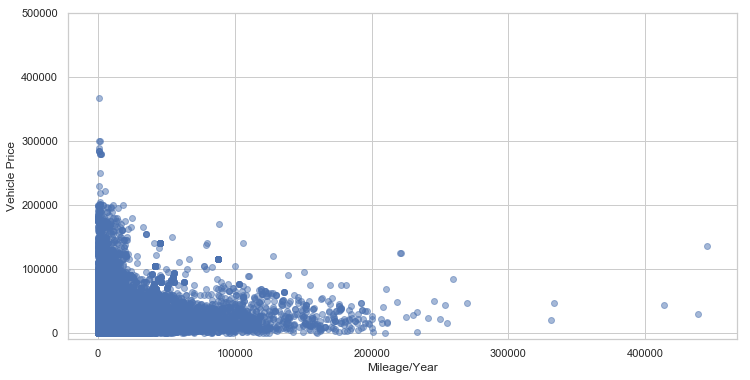

In [30]:
#creating an age column based on the year and calculating the average mileage/year
craig_clean['vehicle_age'] = 2019 - craig_clean.year
craig_clean['mileage_per_year'] = craig_clean.odometer / craig_clean.vehicle_age

plt.scatter(
    craig_clean.mileage_per_year,
    craig_clean.price,
    alpha=0.5
)
plt.xlabel('Mileage/Year')
plt.ylabel('Vehicle Price')
plt.ylim(-10000, 500000)
plt.show()

The price of the vehicles increase as the mileage/year decreases. This is another variable that could be influenced by the type of vehicle being driven as I assume some cars will be driven less miles/year than others.

<Figure size 864x1296 with 0 Axes>

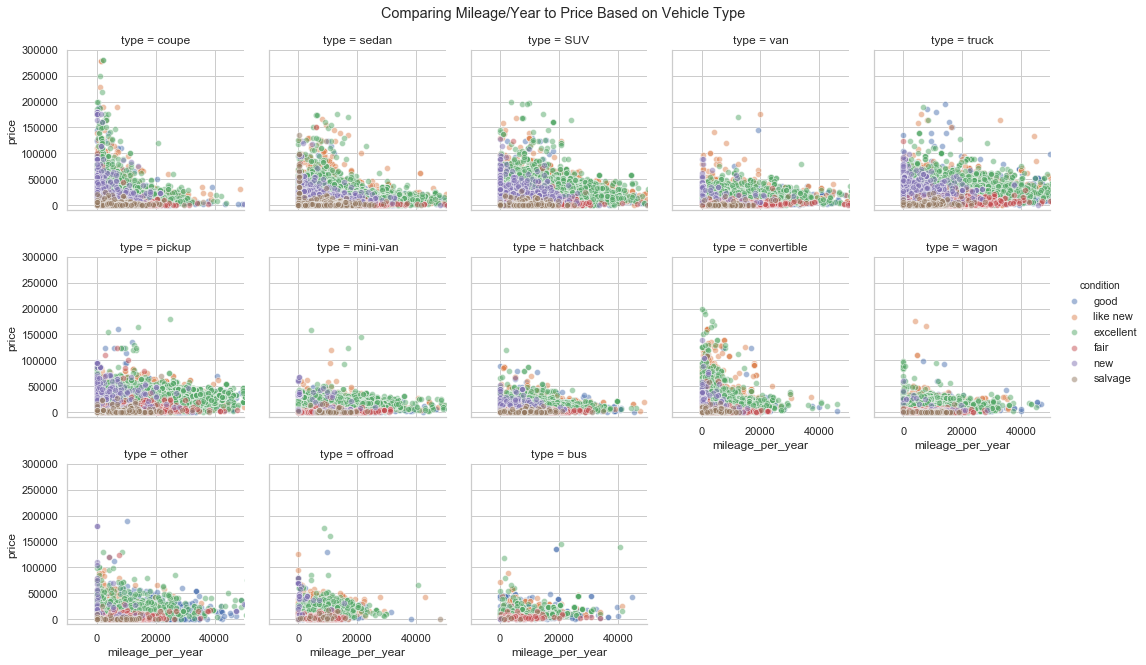

In [31]:
plt.figure(figsize=(12,18))
g = sns.FacetGrid(data=craig_clean, col='type', col_wrap=5, hue='condition', legend_out=True)
g.map(sns.scatterplot, 'mileage_per_year', 'price', alpha=0.5).add_legend()
plt.ylim(-10000, 300000)
plt.xlim(-10000, 50000)
plt.suptitle('Comparing Mileage/Year to Price Based on Vehicle Type', y=1.025)
plt.show()

There are definitely some outliers on the high end of mileage/year, which could help to identify vehicles with unrealistic odometer values. The interesting part of the correlations are that trucks, pickups, and type-other vehicles are not decreasing in price with increasing mileage/year as fast as the other vehicle types. Predictably the convertibles seem to decrease in price the fastest. Offroad vehicles also seem to decrease quickly, but I assume it's because these vehicles don't see as many miles as normal cars.

<Figure size 864x1296 with 0 Axes>

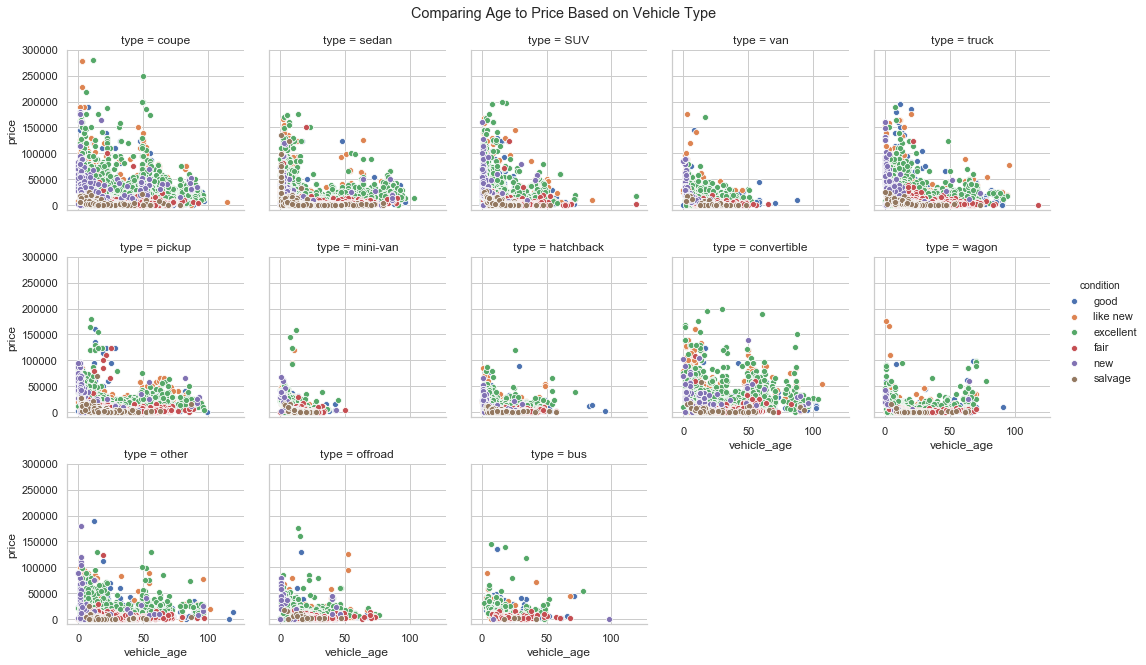

In [32]:
plt.figure(figsize=(12,18))

g = sns.FacetGrid(data=craig_clean, col='type', col_wrap=5, hue='condition', legend_out=True)
g.map(sns.scatterplot, 'vehicle_age', 'price').add_legend()

plt.ylim(-10000, 300000)
plt.suptitle('Comparing Age to Price Based on Vehicle Type', y=1.025)
#plt.legend()
plt.show()

Most of the vehicle types in the dataset decrease in price with age, except for the wagons. There is a slight increase in price after 50 years old, which could be useful in modeling. It is clear that vehicles less than 25 years old are more expensive than the older vehicles in the dataset. The only subset of types that does not follow that trend are convertibles and coupes.

## New & Used Prices

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


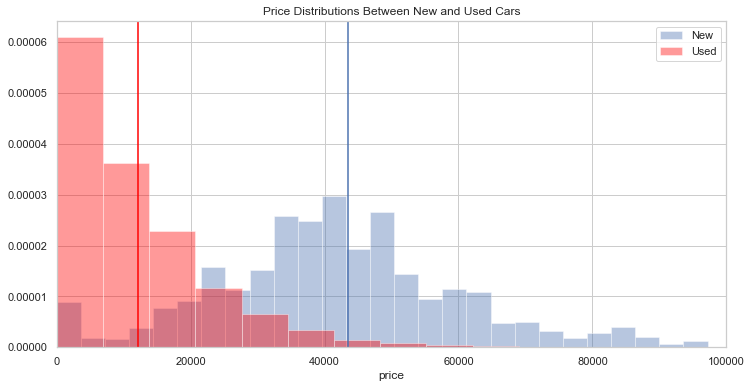

New Car Mean Price: 43533
Used Car Mean Price: 12078


In [34]:
mask = (
    (craig_clean.year >= 2018) &
    (craig_clean.odometer < 300)
)

sns.distplot(
    craig_clean.loc[mask].price,
    kde=False,
    norm_hist=True,
    label='New'
)
sns.distplot(
    craig_clean.loc[~mask].price,
    kde=False,
    norm_hist=True,
    label='Used',
    bins=500,
    color='red'
)
plt.axvline(craig_clean.loc[mask].price.mean())
plt.axvline(craig_clean.loc[~mask].price.mean(), color='red')
plt.xlim(0,100000)
plt.legend()
plt.title('Price Distributions Between New and Used Cars')
plt.show()
print('New Car Mean Price: {:.0f}'.format(craig_clean.loc[mask].price.mean()))
print('Used Car Mean Price: {:.0f}'.format(craig_clean.loc[~mask].price.mean()))

By identifying whether a car is used or new shows a clear separation in the population means. On average, a new car is much more expensive than a used car in the dataset.

## Other Categories

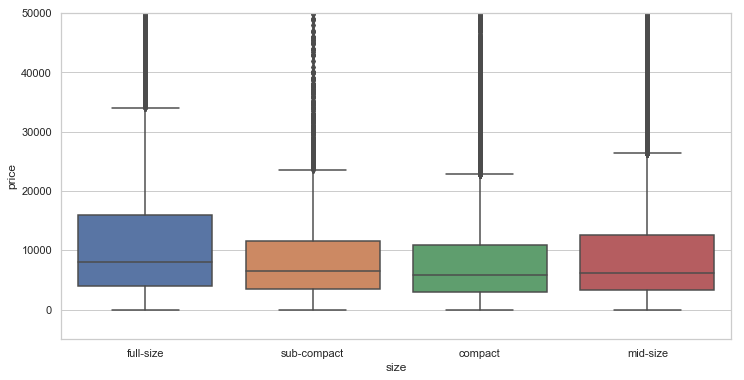

In [35]:
sns.boxplot(
    craig_clean['size'],
    craig_clean['price']
)
plt.ylim(-5000, 50000)
plt.show()

The breakout of prices based on vehicle is very predictable. Full-size are the most expensive followed by mid-size and sub-compact. There could be some issues with what is being defined as sub-compact vs. compact. It's strange that compact cars would be cheaper than sub-compact.

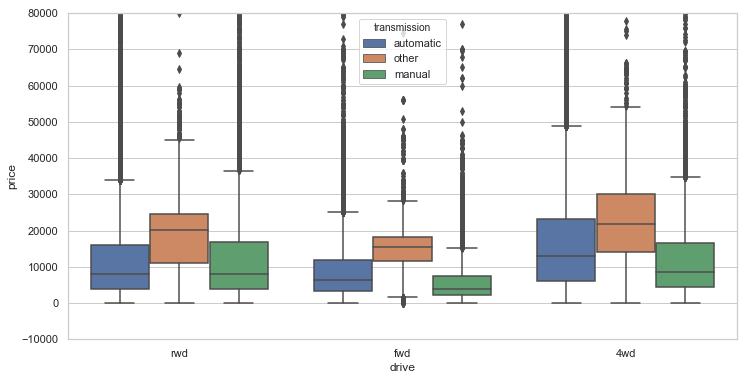

Transmission type-other accounts for 18443 observations
RWD manual car mean price: 12873.091686733997
RWD automatic car mean price: 11656.665132888693


In [36]:
sns.boxplot(
    craig_clean['drive'],
    craig_clean['price'],
    hue=craig_clean['transmission']
)
plt.ylim(-10000, 80000)
plt.show()
rwd_manual = craig_clean.loc[(craig_clean.transmission == 'manual') & (craig_clean.drive == 'rwd')]
rwd_auto = craig_clean.loc[(craig_clean.transmission == 'automatic') & (craig_clean.drive == 'rwd')]
print('Transmission type-other accounts for {} observations'.format(len(craig_clean.loc[craig_clean.transmission == 'other'])))
print('RWD manual car mean price: {}'.format(rwd_manual.price.mean()))
print('RWD automatic car mean price: {}'.format(rwd_auto.price.mean()))

The other type accounts for a small portion of the dataset, but it is unclear as to what this means. One potential explanation is that sellers have special types of aftermarket transmissions that they wanted to call out specifically in the vehicle description. Based on the higher prices it is possible that is the case.

There does seem to be some separation between the drive of the car and the transmission when it comes to price. Only rear wheel drive cars are equal when it comes to price vs. transmission type (manual might have an edge here). Otherwise, manual transmissions are on average less expensive than automatics.

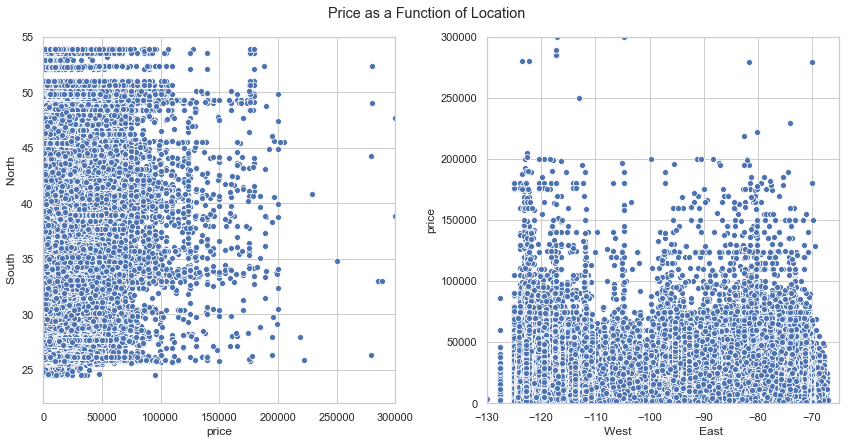

In [37]:
plt.subplot(1,2,1)
sns.scatterplot(
    craig_clean.price,
    craig_clean.lat
)
plt.ylabel('South                    North')
plt.ylim(22, 55)
plt.xlim(0, 300000)

plt.subplot(1,2,2)
sns.scatterplot(
    craig_clean.long,
    craig_clean.price
)
plt.xlabel('West                    East')
plt.xlim(-130, -65)
plt.ylim(0, 300000)

plt.suptitle('Price as a Function of Location', y=1.025)
plt.tight_layout()
plt.show()

Price does not seem to be affected on the gross scale by any sort of regional boundary. The vehicles over 200,000 dollars are Ferraris, which do not show up in the middle of the country. The longitude might be useful in helping to predict the upper end cars in the knn model that cannot take categorical features. I have outlined above how some states have higher prices on average than other, but there doesn't seem to be any sort of regional trends present. Likely the type of vehicle in each specific area will have different price tendencies. For example, trucks are probably worth more in states with harsh weather or they are needed for economic reasons, where they are likely less expensive in cities because the market would be softer.

In [44]:
craig_clean.loc[craig_clean.manufacturer == 'hennessey']

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,state_fips,state_code,state_name,weather,inf_model,lat_short,long_short,null_state_code,vehicle_age,mileage_per_year
211185,newyork,33500,2011.0,hennessey,hpe650,excellent,8 cylinders,gas,18400.0,clean,...,36.0,NY,New York,53.0,NaN,40.62,-73.63,0,8.0,2300.0


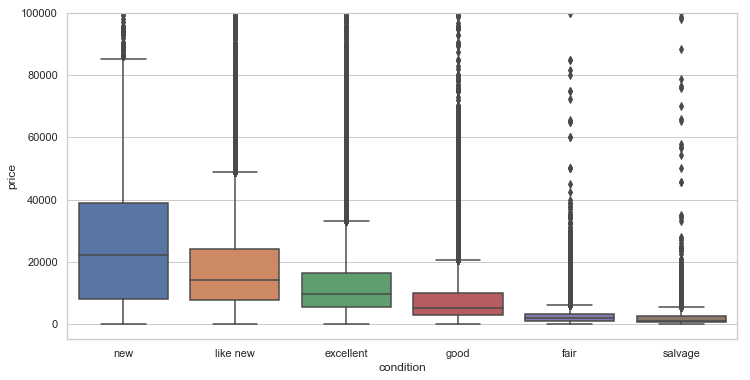

excellent    304745
good         258254
like new      72924
fair          43831
new            4009
salvage        2962
Name: condition, dtype: int64


In [51]:
sns.boxplot(
    x=craig_clean.condition,
    y=craig_clean.price,
    order = craig_clean.groupby('condition')['price'].aggregate(np.median).sort_values(ascending=False).index
)
plt.ylim(-5000, 100000)
plt.show()
print(craig_clean.condition.value_counts())

Vehicle conditions that are less than excellent are below average priced when compared to the rest of the dataset. Vehicle type's good, fair, and salvage are all below average priced. Excellent, like_new, and new type vehicles are all at the average dataset price or above.